Text(3.46, 38.09999999999818, '$slope=\\frac{r_m \\beta_T}{4}$')

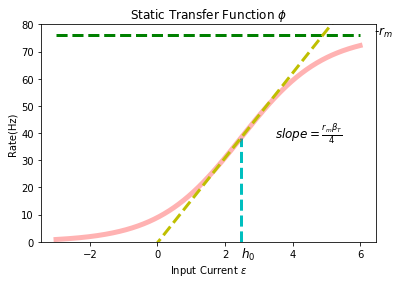

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
r_m=76.2
beta_T=0.82
h_0=2.46
phi=np.zeros(900)
count=0
for xi in np.arange(-3,6,0.01):
    phi[count]=r_m/(1+np.exp(-beta_T*(xi-h_0)))
    count=count+1
plt.figure()
plt.title("Static Transfer Function $\phi$")
plt.xlabel("Input Current $\epsilon$")
plt.ylabel("Rate(Hz)")
plt.ylim([0,80])
#plt.plot(np.arange(-3,6,0.01),phi_i)
plt.plot(np.arange(-3,6,0.01),phi,'-r',linewidth=5,alpha=0.3)
plt.vlines(h_0, 0,phi[int((h_0+3)/0.01)], colors = "c", linestyles = "dashed",linewidth=3)
plt.hlines(r_m,-3,6,colors='g',linestyles = "dashed",linewidth=3)
plt.text(6.4,r_m,'-$r_m$',size='12')
plt.text(h_0,-6,'$h_0$',size='12')
y_line=np.zeros(900)
count=0
slope=r_m*beta_T/4
for xi in np.arange(-3,6,0.01):
    y_line[count]=slope*xi-h_0*slope+phi[int((h_0+3)/0.01)]
    count=count+1
plt.plot(np.arange(-3,6,0.01),y_line,'--y',linewidth=3)
plt.text(h_0+1,phi[int((h_0+3)/0.01)],r'$slope=\frac{r_m \beta_T}{4}$',size='12')

Text(27.6, 0.32999999999999996, '$slope=0.5*\\beta_f$')

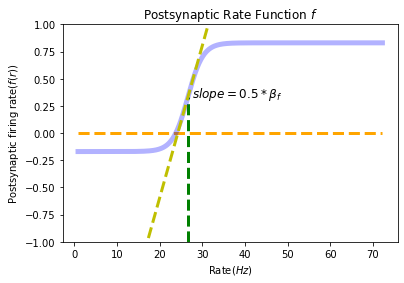

In [15]:
c=0.005
N=50000
x_f=26.6
beta_f=0.28
q_f=0.83
A=3.55
f=np.zeros(900)
r=np.zeros(900)
count=0
for xi in np.arange(-3,6,0.01):
    r[count]=r_m/(1+np.exp(-beta_T*(xi-h_0)))
    f[count]=0.5*(2*q_f-1+np.tanh(beta_f*(r[count]-x_f)))
    count=count+1
plt.figure()
plt.title('Postsynaptic Rate Function $f$')
plt.xlabel('Rate($Hz$)')
plt.ylabel('Postsynaptic firing rate($f(r)$)')
plt.ylim(-1,1)
plt.plot(r,f,'-b',linewidth=5,alpha=0.3)
plt.hlines(0,r[0],r[899],colors="orange",linestyles="dashed",linewidth=3)
plt.vlines(x_f,-1,(0.5*(2*q_f-1)),colors="g",linestyles="dashed",linewidth=3)
f_line=np.zeros(900)
f_slope=0.5*beta_f
for count in range(900):
    f_line[count]=f_slope*(r[count]-x_f)+0.5*(2*q_f-1)
plt.plot(r,f_line,'--y',linewidth=3)
plt.text(x_f+1,(0.5*(2*q_f-1)),r'$slope=0.5*\beta_f$',size='12')

Text(27.6, -0.5, '$slope=0.5*\\beta_g$')

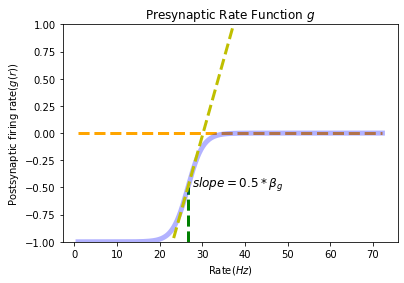

In [16]:
q_g=0
beta_g=beta_f
x_g=x_f
count=0
g=np.zeros(900)
for xi in np.arange(-3,6,0.01):
    g[count]=0.5*(2*q_g-1+np.tanh(beta_g*(r[count]-x_g)))
    count=count+1
plt.figure()
plt.title('Presynaptic Rate Function $g$')
plt.xlabel('Rate($Hz$)')
plt.ylabel('Postsynaptic firing rate($g(r)$)')
plt.ylim(-1,1)
plt.plot(r,g,'-b',linewidth=5,alpha=0.3)
plt.hlines(0,r[0],r[899],colors="orange",linestyles="dashed",linewidth=3)
plt.vlines(x_f,-1,(0.5*(2*q_g-1)),colors="g",linestyles="dashed",linewidth=3)
g_line=np.zeros(900)
g_slope=0.5*beta_f
for count in range(900):
    g_line[count]=g_slope*(r[count]-x_g)+0.5*(2*q_g-1)
plt.plot(r,g_line,'--y',linewidth=3)
plt.text(x_g+1,(0.5*(2*q_g-1)),r'$slope=0.5*\beta_g$',size='12')

In [17]:
# Structral connectivity matrix
p=1
######
N=14
######

#Firing rate pattern
C=np.zeros((N,N))
xi_pattern=np.random.normal(0,1,size=(p,N))
r_pattern=r_m/(1+np.exp(-beta_T*(xi_pattern-h_0)))
print(r_pattern)
for i in range(N):
    for j in range(N):
        if random.uniform(0,1)<0.005:
            C[i,j]=1
print(C)

[[18.46752403  6.28717304 16.6301757   5.38231067 10.75764677  3.2397416
   4.03422797 17.28485615 12.89617874  6.17924598 12.99232017  6.3753334
  10.70780083 10.10159994]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [18]:
#Final connectivity matrix J
J=np.zeros((N,N))
def f(r):
    return 0.5*(2*q_f-1+np.tanh(beta_f*(r-x_f)))
def g(r):
    return 0.5*(2*q_g-1+np.tanh(beta_g*(r-x_g)))
for i in range(N):
    for j in range(N):
        Sum=0
        for k in range(p):
            Sum=Sum+f(r_pattern[k,i])*g(r_pattern[k,j])
        J[i,j]=A*C[i,j]/c/N*Sum
print(J)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
# starting state close to the pattern
r0=np.zeros(N)
for i in range(p):
    for j in range(N):
        r0[j]=np.random.normal(r_pattern[i,j],1)
print(r0)

[21.09046619  6.690764   17.22351702  6.22698385 11.80629947  2.36935755
  3.89970855 16.94036867 12.9391068   5.82416193 14.57883293  5.38813468
  9.56808892 10.25564189]


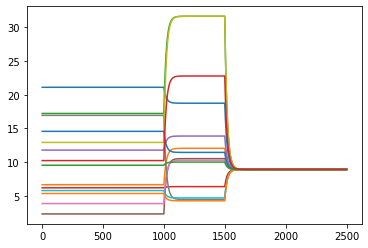

In [20]:
#Novel stimulus
t_max=2500
r=np.zeros((N,t_max))
tau=20
t_pre=1000
t_delay=1500
dt=1
I0=1
ita=np.random.normal(0,1,size=N)
I=I0*ita
def phi(xi):
    return r_m/(1+np.exp(-beta_T*(xi-h_0)))
for t in range(0,t_pre):
    r[:,t]=r0
for t in range(t_pre,t_delay):
    for i in range(N):
        xi=0
        for j in range(N):
            if j!=i:
                xi=xi+J[i,j]*r[j,t-1]
        r[i,t]=r[i,t-1]+(-r[i,t-1]+phi(I[i]+xi))/tau*dt
for t in range(t_delay,t_max):
    for i in range(N):
        xi=0
        for j in range(N):
            if j!=i:
                xi=xi+J[i,j]*r[j,t-1]
        r[i,t]=r[i,t-1]+(-r[i,t-1]+phi(xi))/tau*dt
plt.figure()
for i in range(N):
    plt.plot(range(t_max),r[i])

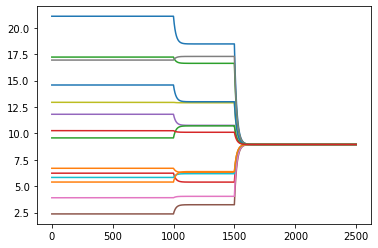

In [22]:
#Familiar Stimulus
I=I0*xi_pattern[0]
for t in range(0,t_pre):
    r[:,t]=r0
for t in range(t_pre,t_delay):
    for i in range(N):
        xi=0
        for j in range(N):
            if j!=i:
                xi=xi+J[i,j]*r[j,t-1]
        r[i,t]=r[i,t-1]+(-r[i,t-1]+phi(I[i]+xi))/tau*dt
for t in range(t_delay,t_max):
    for i in range(N):
        xi=0
        for j in range(N):
            if j!=i:
                xi=xi+J[i,j]*r[j,t-1]
        r[i,t]=r[i,t-1]+(-r[i,t-1]+phi(xi))/tau*dt
plt.figure()
for i in range(N):
    plt.plot(range(t_max),r[i])